In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [44]:
data=pd.read_csv(r"C:\python\ml\datasets\data.csv",encoding='latin1')
print(data.head(10))


   CustomerKey MaritalStatus  FirstName LastName   BirthDate Gender  \
0        11000             M        JON     YANG  04-08-1966      M   
1        11001             S     EUGENE    HUANG   5/14/1965      M   
2        11002             M      RUBEN   TORRES  08-12-1965      M   
3        11003             S    CHRISTY      ZHU   2/15/1968      F   
4        11004             S  ELIZABETH  JOHNSON  08-08-1968      F   
5        11005             S      JULIO     RUIZ  08-05-1965      M   
6        11007             M      MARCO    MEHTA  05-09-1964      M   
7        11088             S      ROBIN  VERHOFF  07-07-1964      F   
8        11009             S    SHANNON  CARLSON  04-01-1964      M   
9        11010             S  JACQUELYN   SUAREZ  02-06-1964      F   

  AnnualIncome  TotalChildren  
0       90,000              2  
1       60,000              3  
2          NaN              3  
3       70,000              0  
4       80,000              5  
5          NaN            

In [45]:
print(data.shape)

(19, 8)


data cleaning

handling null values .

part-1 finding null values

In [46]:
data.isnull()


,CustomerKey,MaritalStatus,FirstName,LastName,BirthDate,Gender,AnnualIncome,TotalChildren
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,True,False


In [47]:
print(data.isnull().sum()) # give every column and count of null values present in
print()
print(data.shape[0]) #give number of rows

CustomerKey      0
MaritalStatus    0
FirstName        0
LastName         0
BirthDate        0
Gender           0
AnnualIncome     5
TotalChildren    0
dtype: int64

19


In [48]:
print((data.isnull().sum()/data.shape[0])*100) #gives how much percentage of null value is present in every column

CustomerKey       0.000000
MaritalStatus     0.000000
FirstName         0.000000
LastName          0.000000
BirthDate         0.000000
Gender            0.000000
AnnualIncome     26.315789
TotalChildren     0.000000
dtype: float64


In [49]:
print(data.isnull().sum().sum()) # overall data has how many number of columns null values
print()
print((data.isnull().sum().sum()/(data.shape[0]*data.shape[1]))*100) #gives how much percentage of null value is present in all column combined


5

3.289473684210526


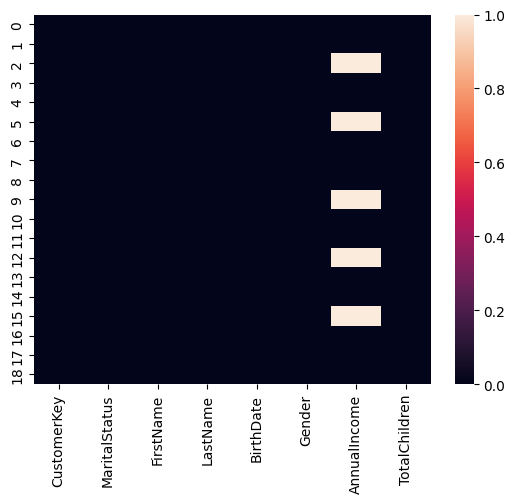

In [50]:
#graph
sns.heatmap(data.isnull())
plt.show()

part-2 handling null values 

1)  if null value percentage greater than 50% we cant proceed

   -> delte columns if it is not important 

   -> delete null value rows if it is impt

In [51]:
# data.drop(["col1","col2"],inplace=True) drop columns as many as u want
# data.dropna(inplace=True) #drop all null value rows


2) if u have null value percentage less than 50 % . we can proceed

(imputing categorical data) 

3 ways of filling data in categorical way . forward filling,  backward filling,mode way-> most freq data 

In [52]:
# data.fillna(value) fill all null values with this value . it is a bad idea

#backward filling
data
data.fillna(method="bfill")

#forward filling
data
# data.fillna(method="ffill",axis=1) axis=1 means column wise axis=0 means row wise
data.fillna(method="ffill")

#mode way filling
# data['AnnualIncome'].mode()[0] #mode equals
data['AnnualIncome'].fillna(data['AnnualIncome'].mode()[0])


C:\Users\Nikhil\AppData\Local\Temp\ipykernel_24692\1463522230.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method="bfill")
C:\Users\Nikhil\AppData\Local\Temp\ipykernel_24692\1463522230.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method="ffill")


0       90,000
1       60,000
2       60,000
3       70,000
4       80,000
5       60,000
6       60,000
7       60,000
8       70,000
9       60,000
10      60,000
11    1,00,000
12      60,000
13    1,00,000
14      30,000
15      60,000
16      20,000
17      30,000
18      40,000
Name: AnnualIncome, dtype: object

In [53]:
# fill mode way data in multiple columns
data.select_dtypes(include="object") # select all columns with object datatype
data.select_dtypes(include="object").isnull()
data.select_dtypes(include="object").isnull().sum()
data.select_dtypes(include="object").columns

for i in data.select_dtypes(include="object").columns:
    data[i].fillna(data[i].mode()[0])
    
data

,CustomerKey,MaritalStatus,FirstName,LastName,BirthDate,Gender,AnnualIncome,TotalChildren
0,11000,M,JON,YANG,04-08-1966,M,"90,000",2
1,11001,S,EUGENE,HUANG,5/14/1965,M,"60,000",3
2,11002,M,RUBEN,TORRES,08-12-1965,M,NaN,3
3,11003,S,CHRISTY,ZHU,2/15/1968,F,"70,000",0
4,11004,S,ELIZABETH,JOHNSON,08-08-1968,F,"80,000",5
5,11005,S,JULIO,RUIZ,08-05-1965,M,NaN,0
6,11007,M,MARCO,MEHTA,05-09-1964,M,"60,000",3
7,11088,S,ROBIN,VERHOFF,07-07-1964,F,"60,000",4
8,11009,S,SHANNON,CARLSON,04-01-1964,M,"70,000",0
9,11010,S,JACQUELYN,SUAREZ,02-06-1964,F,NaN,0


using scikit learn

In [54]:
from sklearn.impute import SimpleImputer

In [55]:
data['AnnualIncome'] = data['AnnualIncome'].str.replace(',', '', regex=False)
data['AnnualIncome'] = pd.to_numeric(data['AnnualIncome'], errors='coerce')

# Now apply imputer
si = SimpleImputer(strategy="mean")
ar=si.fit_transform(data[['AnnualIncome']]) 
new_Data=pd.DataFrame(ar,columns=["AnnualIncome"])
new_Data.isnull().sum()


AnnualIncome    0
dtype: int64

In [56]:
data["AnnualIncome"].mean()

62142.857142857145

One Hot Encoding

convert categorial data to numerical

In [57]:
en_col=data[["MaritalStatus","Gender"]]
en_data=pd.get_dummies(en_col)
en_data


,MaritalStatus_M,MaritalStatus_S,Gender_F,Gender_M
0,True,False,False,True
1,False,True,False,True
2,True,False,False,True
3,False,True,True,False
4,False,True,True,False
5,False,True,False,True
6,True,False,False,True
7,False,True,True,False
8,False,True,False,True
9,False,True,True,False


In [58]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
ar=ohe.fit_transform(en_col).toarray()
pd.DataFrame(ar,columns=["MaritalStatus_M","MaritalStatus_S","Gender_F","Gender_M"])

,MaritalStatus_M,MaritalStatus_S,Gender_F,Gender_M
0,1.0,0.0,0.0,1.0
1,0.0,1.0,0.0,1.0
2,1.0,0.0,0.0,1.0
3,0.0,1.0,1.0,0.0
4,0.0,1.0,1.0,0.0
5,0.0,1.0,0.0,1.0
6,1.0,0.0,0.0,1.0
7,0.0,1.0,1.0,0.0
8,0.0,1.0,0.0,1.0
9,0.0,1.0,1.0,0.0


LabelEncoding

In [59]:
from sklearn.preprocessing import LabelEncoder
df=pd.DataFrame({"name":["wscube","cow","cat","dog","black"]})
le=LabelEncoder()
df["en_name"]=le.fit_transform(df["name"])
df

,name,en_name
0,wscube,4
1,cow,2
2,cat,1
3,dog,3
4,black,0


In [60]:
le.fit(data["FirstName"])
data["en_FirstName"]=le.transform(data["FirstName"])
data

,CustomerKey,MaritalStatus,FirstName,LastName,BirthDate,Gender,AnnualIncome,TotalChildren,en_FirstName
0,11000,M,JON,YANG,04-08-1966,M,90000.0,2,8
1,11001,S,EUGENE,HUANG,5/14/1965,M,60000.0,3,5
2,11002,M,RUBEN,TORRES,08-12-1965,M,NaN,3,14
3,11003,S,CHRISTY,ZHU,2/15/1968,F,70000.0,0,1
4,11004,S,ELIZABETH,JOHNSON,08-08-1968,F,80000.0,5,4
5,11005,S,JULIO,RUIZ,08-05-1965,M,NaN,0,9
6,11007,M,MARCO,MEHTA,05-09-1964,M,60000.0,3,12
7,11088,S,ROBIN,VERHOFF,07-07-1964,F,60000.0,4,13
8,11009,S,SHANNON,CARLSON,04-01-1964,M,70000.0,0,15
9,11010,S,JACQUELYN,SUAREZ,02-06-1964,F,NaN,0,7


Ordinal Encoding

In [61]:
from sklearn.preprocessing import OrdinalEncoder

df=pd.DataFrame({"size":["s","m","l","xl","xxl","s","m","l","s","s","l","xl","m"]})
df.head(4)
ord_data=[["s","m","l","xl","xxl"]]

ode=OrdinalEncoder(categories=ord_data)
ode.fit(df[["size"]])
df["size_en"]=ode.transform(df[["size"]])
df

,size,size_en
0,s,0.0
1,m,1.0
2,l,2.0
3,xl,3.0
4,xxl,4.0
5,s,0.0
6,m,1.0
7,l,2.0
8,s,0.0
9,s,0.0


In [62]:
ord_data1={"s":0,"m":1,"l":2,"xl":3,"xxl":4}
df["size_en_map"]=df["size"].map(ord_data1)
df

,size,size_en,size_en_map
0,s,0.0,0
1,m,1.0,1
2,l,2.0,2
3,xl,3.0,3
4,xxl,4.0,4
5,s,0.0,0
6,m,1.0,1
7,l,2.0,2
8,s,0.0,0
9,s,0.0,0


In [63]:
data["size"]=pd.DataFrame({"size":["s","m","l","xl","xxl","s","m","l","s","s","l","xl","m","s","l","s","m","l","xl"]})
data["size"].unique()
ord_data=[["s","m","l","xl","xxl"]]
ode=OrdinalEncoder(categories=ord_data)
data["en_size"]=ode.fit_transform(data[["size"]])
data

,CustomerKey,MaritalStatus,FirstName,LastName,BirthDate,Gender,AnnualIncome,TotalChildren,en_FirstName,size,en_size
0,11000,M,JON,YANG,04-08-1966,M,90000.0,2,8,s,0.0
1,11001,S,EUGENE,HUANG,5/14/1965,M,60000.0,3,5,m,1.0
2,11002,M,RUBEN,TORRES,08-12-1965,M,NaN,3,14,l,2.0
3,11003,S,CHRISTY,ZHU,2/15/1968,F,70000.0,0,1,xl,3.0
4,11004,S,ELIZABETH,JOHNSON,08-08-1968,F,80000.0,5,4,xxl,4.0
5,11005,S,JULIO,RUIZ,08-05-1965,M,NaN,0,9,s,0.0
6,11007,M,MARCO,MEHTA,05-09-1964,M,60000.0,3,12,m,1.0
7,11088,S,ROBIN,VERHOFF,07-07-1964,F,60000.0,4,13,l,2.0
8,11009,S,SHANNON,CARLSON,04-01-1964,M,70000.0,0,15,s,0.0
9,11010,S,JACQUELYN,SUAREZ,02-06-1964,F,NaN,0,7,s,0.0


Outliers

In [64]:
data.describe()

,CustomerKey,AnnualIncome,TotalChildren,en_FirstName,en_size
count,19.000000,14.000000,19.000000,19.000000,19.000000
mean,11119.157895,62142.857143,1.947368,8.842105,1.421053
std,459.488878,25473.537228,1.715086,5.398180,1.261207
min,11000.000000,20000.000000,0.000000,0.000000,0.000000
25%,11004.500000,45000.000000,0.000000,4.500000,0.000000
50%,11011.000000,60000.000000,2.000000,9.000000,1.000000
75%,11016.500000,77500.000000,3.000000,13.500000,2.000000
max,13015.000000,100000.000000,5.000000,17.000000,4.000000


<Axes: xlabel='CustomerKey'>

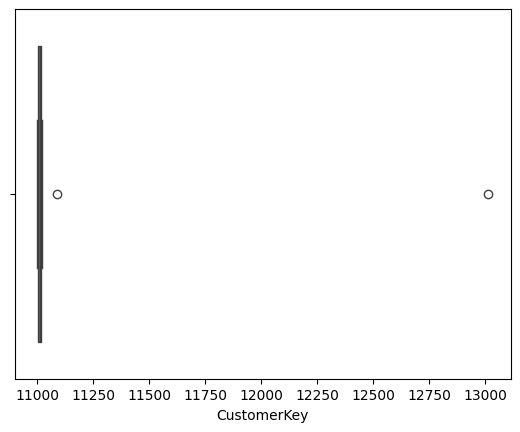

In [65]:
sns.boxplot(x="CustomerKey",data=data)

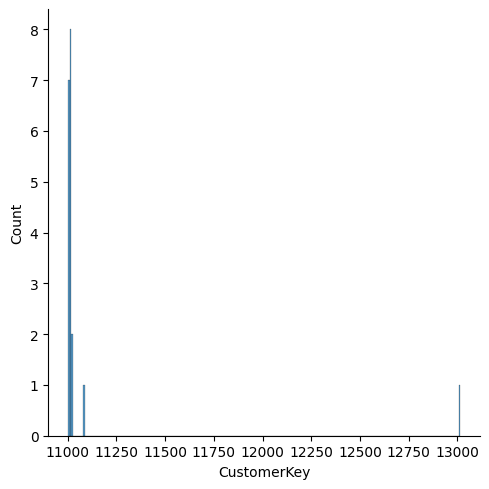

In [66]:
sns.displot(data["CustomerKey"])
plt.show()

In [67]:
data.shape

(19, 11)

In [68]:
q1=data["CustomerKey"].quantile(0.25)
q3=data["CustomerKey"].quantile(0.75)
IQR=q3-q1
min_range=q1-1.5*IQR
max_range=q3+1.5*IQR
min_range , max_range

(10986.5, 11034.5)

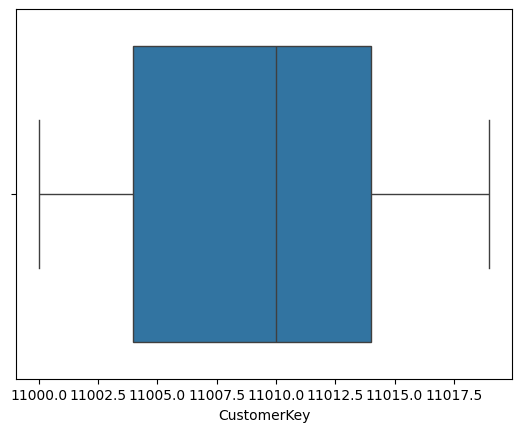

In [69]:
new_data=data[data["CustomerKey"]<=max_range]
new_data.shape
sns.boxplot(x="CustomerKey",data=new_data)
plt.show()

deleting outlier by z score

<Figure size 1500x900 with 0 Axes>

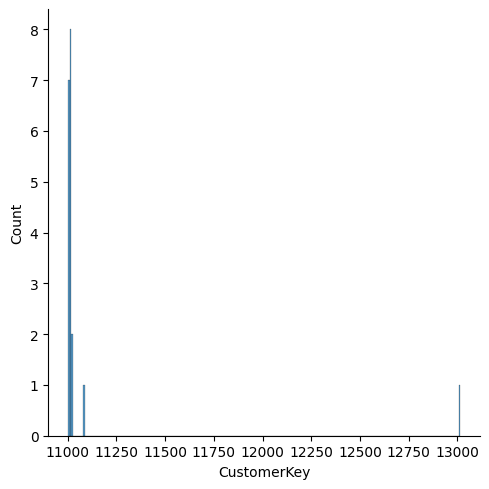

In [70]:
plt.figure(figsize=(5,3),dpi=300)
sns.displot(data=data["CustomerKey"])
plt.show()

In [71]:
min_range=data["CustomerKey"].mean()-3*data["CustomerKey"].std()
max_range=data["CustomerKey"].mean()+3*data["CustomerKey"].std()
new_data=data[data["CustomerKey"]<=max_range]
new_data.shape

(18, 11)

In [72]:
z_score=(data["CustomerKey"] - data["CustomerKey"].mean())/data["CustomerKey"].std()
data["z_score"]=z_score
data[data["z_score"]<3]

,CustomerKey,MaritalStatus,FirstName,LastName,BirthDate,Gender,AnnualIncome,TotalChildren,en_FirstName,size,en_size,z_score
0,11000,M,JON,YANG,04-08-1966,M,90000.0,2,8,s,0.0,-0.259327
1,11001,S,EUGENE,HUANG,5/14/1965,M,60000.0,3,5,m,1.0,-0.257151
2,11002,M,RUBEN,TORRES,08-12-1965,M,NaN,3,14,l,2.0,-0.254974
3,11003,S,CHRISTY,ZHU,2/15/1968,F,70000.0,0,1,xl,3.0,-0.252798
4,11004,S,ELIZABETH,JOHNSON,08-08-1968,F,80000.0,5,4,xxl,4.0,-0.250622
5,11005,S,JULIO,RUIZ,08-05-1965,M,NaN,0,9,s,0.0,-0.248445
6,11007,M,MARCO,MEHTA,05-09-1964,M,60000.0,3,12,m,1.0,-0.244093
7,11088,S,ROBIN,VERHOFF,07-07-1964,F,60000.0,4,13,l,2.0,-0.067810
8,11009,S,SHANNON,CARLSON,04-01-1964,M,70000.0,0,15,s,0.0,-0.239740
9,11010,S,JACQUELYN,SUAREZ,02-06-1964,F,NaN,0,7,s,0.0,-0.237564


Feature scaling

C:\Users\Nikhil\AppData\Local\Temp\ipykernel_24692\530597326.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["AnnualIncome"].fillna(data["AnnualIncome"].mean(),inplace=True)
C:\Users\Nikhil\AppData\Local\Temp\ipykernel_24692\530597326.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to

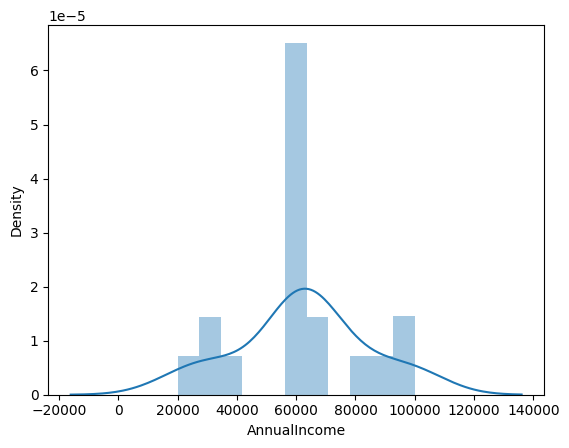

In [73]:
data["AnnualIncome"].fillna(data["AnnualIncome"].mean(),inplace=True)
sns.distplot(data["AnnualIncome"])
plt.show()

In [74]:
data.describe()

,CustomerKey,AnnualIncome,TotalChildren,en_FirstName,en_size,z_score
count,19.000000,19.000000,19.000000,19.000000,19.000000,1.900000e+01
mean,11119.157895,62142.857143,1.947368,8.842105,1.421053,1.043025e-15
std,459.488878,21648.343901,1.715086,5.398180,1.261207,1.000000e+00
min,11000.000000,20000.000000,0.000000,0.000000,0.000000,-2.593270e-01
25%,11004.500000,60000.000000,0.000000,4.500000,0.000000,-2.495336e-01
50%,11011.000000,62142.857143,2.000000,9.000000,1.000000,-2.353874e-01
75%,11016.500000,70000.000000,3.000000,13.500000,2.000000,-2.234176e-01
max,13015.000000,100000.000000,5.000000,17.000000,4.000000,4.125980e+00


In [75]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(data[["AnnualIncome"]])
data["AnnualIncome_ss"]=pd.DataFrame(ss.transform(data[["AnnualIncome"]]),columns=["x"])
data.describe()

,CustomerKey,AnnualIncome,TotalChildren,en_FirstName,en_size,z_score,AnnualIncome_ss
count,19.000000,19.000000,19.000000,19.000000,19.000000,1.900000e+01,1.900000e+01
mean,11119.157895,62142.857143,1.947368,8.842105,1.421053,1.043025e-15,-4.324027e-16
std,459.488878,21648.343901,1.715086,5.398180,1.261207,1.000000e+00,1.027402e+00
min,11000.000000,20000.000000,0.000000,0.000000,0.000000,-2.593270e-01,-2.000045e+00
25%,11004.500000,60000.000000,0.000000,4.500000,0.000000,-2.495336e-01,-1.016972e-01
50%,11011.000000,62142.857143,2.000000,9.000000,1.000000,-2.353874e-01,-3.453075e-16
75%,11016.500000,70000.000000,3.000000,13.500000,2.000000,-2.234176e-01,3.728898e-01
max,13015.000000,100000.000000,5.000000,17.000000,4.000000,4.125980e+00,1.796651e+00


C:\Users\Nikhil\AppData\Local\Temp\ipykernel_24692\2339361356.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["AnnualIncome"])
C:\Users\Nikhil\AppData\Local\Temp\ipykernel_24692\2339361356.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["AnnualIncome_ss"])


<Axes: title={'center': '2 plot'}, xlabel='AnnualIncome_ss', ylabel='Density'>

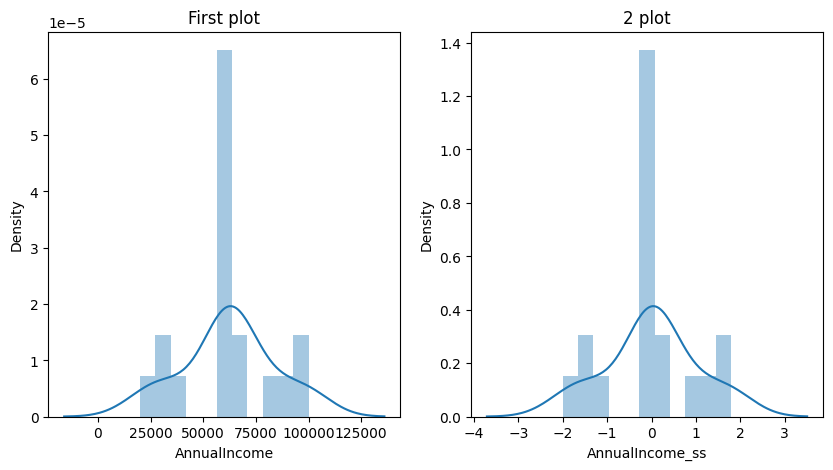

In [76]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("First plot")
sns.distplot(data["AnnualIncome"])
plt.subplot(1,2,2)
plt.title("2 plot")
sns.distplot(data["AnnualIncome_ss"])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
mms.fit(data[["AnnualIncome"]])
data["AnnualIncome_mms"]=mms.transform(data[["AnnualIncome"]])
data.head(3)

,CustomerKey,MaritalStatus,FirstName,LastName,BirthDate,Gender,AnnualIncome,TotalChildren,en_FirstName,size,en_size,z_score,AnnualIncome_ss,AnnualIncome_mms
0,11000,M,JON,YANG,04-08-1966,M,90000.000000,2,8,s,0.0,-0.259327,1.322064e+00,0.875000
1,11001,S,EUGENE,HUANG,5/14/1965,M,60000.000000,3,5,m,1.0,-0.257151,-1.016972e-01,0.500000
2,11002,M,RUBEN,TORRES,08-12-1965,M,62142.857143,3,14,l,2.0,-0.254974,-3.453075e-16,0.526786


C:\Users\Nikhil\AppData\Local\Temp\ipykernel_24692\2505299951.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["AnnualIncome"])
C:\Users\Nikhil\AppData\Local\Temp\ipykernel_24692\2505299951.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["AnnualIncome_mms"])


<Axes: title={'center': '2 plot'}, xlabel='AnnualIncome_mms', ylabel='Density'>

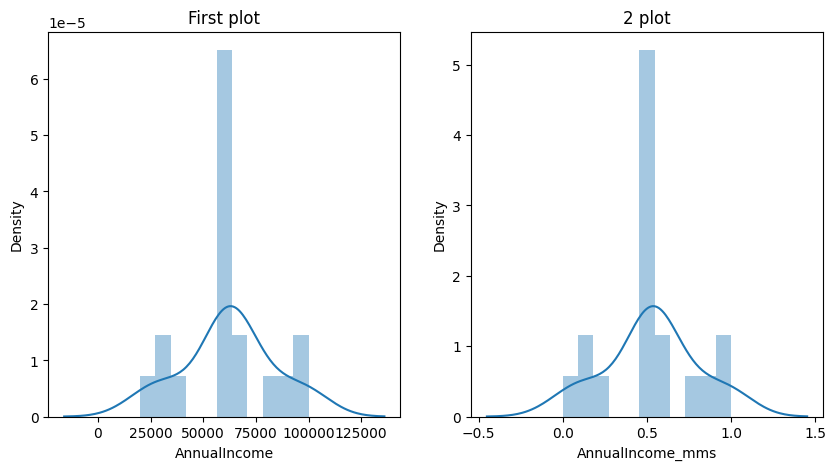

In [78]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("First plot")
sns.distplot(data["AnnualIncome"])
plt.subplot(1,2,2)
plt.title("2 plot")
sns.distplot(data["AnnualIncome_mms"])

Handling duplicate data

In [79]:
data={"name":["a","b","c","d","a","c"],"eng":[8,7,5,8,8,5],"hindi":[2,3,4,5,2,6]}
df=pd.DataFrame(data)
# df["duplicated"]=df.duplicated()
df.drop_duplicates(inplace=True)
df


,name,eng,hindi
0,a,8,2
1,b,7,3
2,c,5,4
3,d,8,5
5,c,5,6


In [80]:
data=pd.read_csv(r"C:\python\ml\datasets\data.csv")
data.duplicated()
print(data.shape)
data.drop_duplicates(inplace=True)
data
data.shape

(19, 8)


(19, 8)

Replace and Data Type Change

In [81]:
# data.info()
# data.isnull()
data["AnnualIncome"].value_counts()
data["AnnualIncome"].fillna(data["AnnualIncome"].mode()[0],inplace=True)
data['AnnualIncome'] = data['AnnualIncome'].str.replace(',', '', regex=False)
data["AnnualIncome"]=data["AnnualIncome"].astype("int64")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerKey    19 non-null     int64 
 1   MaritalStatus  19 non-null     object
 2   FirstName      19 non-null     object
 3   LastName       19 non-null     object
 4   BirthDate      19 non-null     object
 5   Gender         19 non-null     object
 6   AnnualIncome   19 non-null     int64 
 7   TotalChildren  19 non-null     int64 
dtypes: int64(3), object(5)
memory usage: 1.3+ KB


C:\Users\Nikhil\AppData\Local\Temp\ipykernel_24692\4133162286.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["AnnualIncome"].fillna(data["AnnualIncome"].mode()[0],inplace=True)


Functional transformer

C:\Users\Nikhil\AppData\Local\Temp\ipykernel_24692\1259906547.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["TotalChildren"])


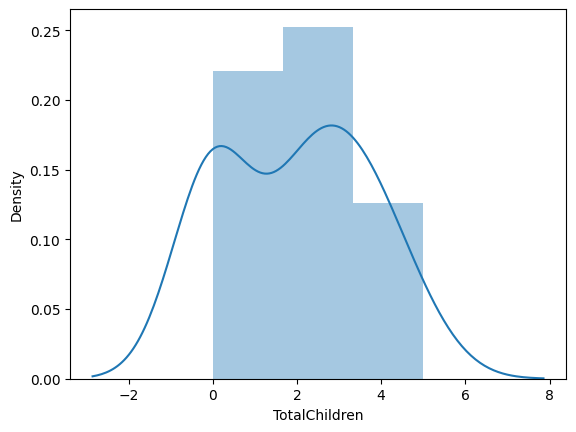

In [82]:
data.isnull().sum()
sns.distplot(data["TotalChildren"])
plt.show()

In [83]:
q1=data["TotalChildren"].quantile(0.25)
q3=data["TotalChildren"].quantile(0.75)
IQR=q3-q1
min_r=q1-1.5*IQR
max_r=q3+1.5*IQR
data=data[data["TotalChildren"]<=max_r]

In [84]:
from sklearn.preprocessing import FunctionTransformer
ft=FunctionTransformer(func=lambda x:x**2)
ft.fit(data[["TotalChildren"]])
data["TotalChildren_ft"]=ft.transform(data[["TotalChildren"]])

C:\Users\Nikhil\AppData\Local\Temp\ipykernel_24692\556770414.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["TotalChildren"])
C:\Users\Nikhil\AppData\Local\Temp\ipykernel_24692\556770414.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["TotalChildren_ft"])


<Axes: title={'center': 'After'}, xlabel='TotalChildren_ft', ylabel='Density'>

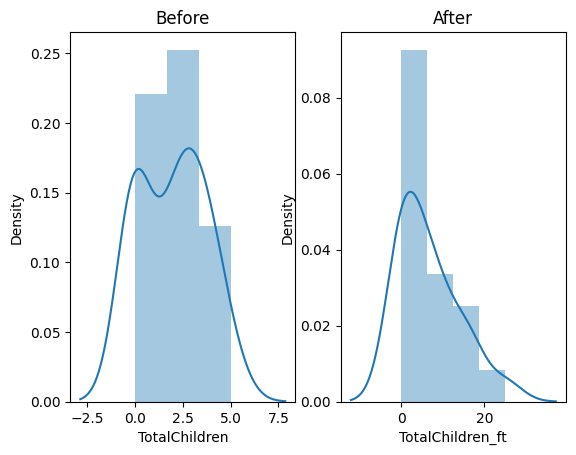

In [85]:
plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(data["TotalChildren"])
plt.subplot(1,2,2)
plt.title("After")
sns.distplot(data["TotalChildren_ft"])

Feature scaling

In [86]:
# from mlxtend.feature_selection import SequentialFeatureSelector
# data=pd.read_csv("diab.csv")
# x=data.iloc[:,:-1]
#y=data["outcome"]
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
# fr=SequentialFeatureSelector(lr,k_features=noofcolumns,forward=true)
# fr.fit(x,y)
